In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [332]:
ci = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
ci

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Loading the dataset into the dataframe.

In [333]:
ci.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Displaying the columns in the dataframe.

In [334]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Checking for any null values using info() in the dataframe.

In [335]:
ci.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [336]:
ci.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Checking for total null values in each columns.

In [337]:
ci['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Looking for unique values in the above 'Native_country' column.

In [338]:
ci['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Looking for unique values in the above 'Occupation' column.

In [339]:
ci['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

Looking for unique values in the above 'Hours_per_week' column.

In [340]:
ci.loc[ci.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


Looking for any empty values with '?' in the above 'Native_country' column.

In [341]:
ci.loc[ci.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Looking for any empty values with '?' in the above 'Occupation' column.

In [342]:
ci.loc[ci.Workclass==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Looking for any empty values with '?' in the above 'Workclass' column.

In [343]:
ci.drop(ci[ci['Native_country'] == ' ?'].index,inplace=True)
ci.drop(ci[ci['Occupation'] == ' ?'].index,inplace=True)
ci.drop(ci[ci['Workclass'] == ' ?'].index,inplace=True)
ci

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Dropping the negative values in the above columns.

<AxesSubplot:>

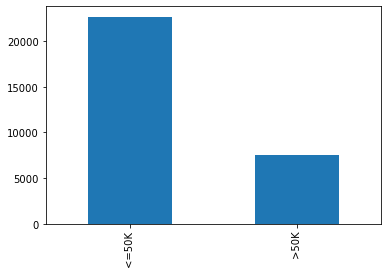

In [344]:
ci['Income'].value_counts().plot(kind='bar')

The above is a bar graph displaying salary greater than 50k and less than/equal to 50k.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

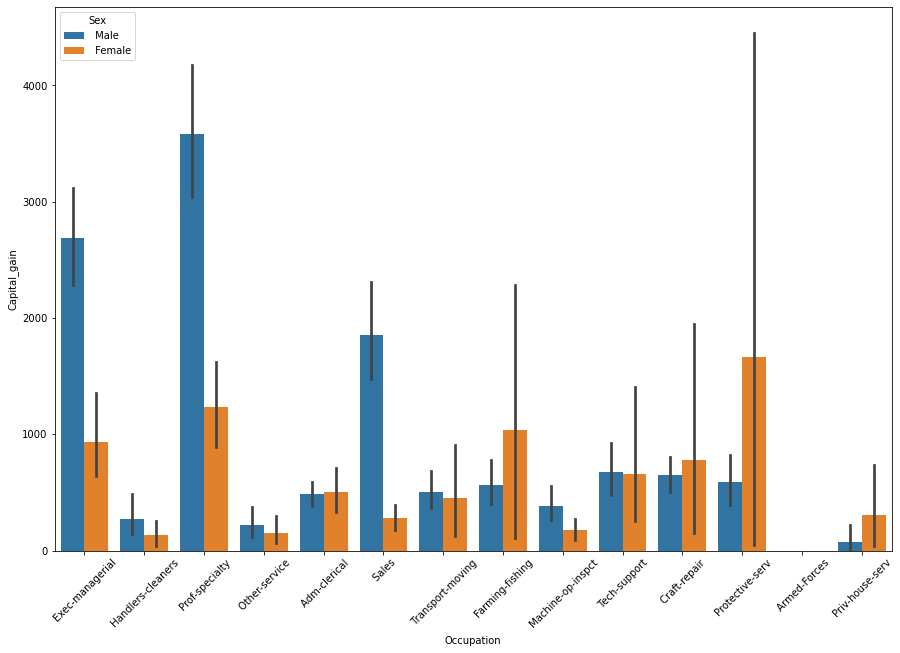

In [345]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=ci,hue='Sex')
plt.xticks(rotation=45)

The above is a bar graph relating Occupation, Capital_gain and Sex.

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

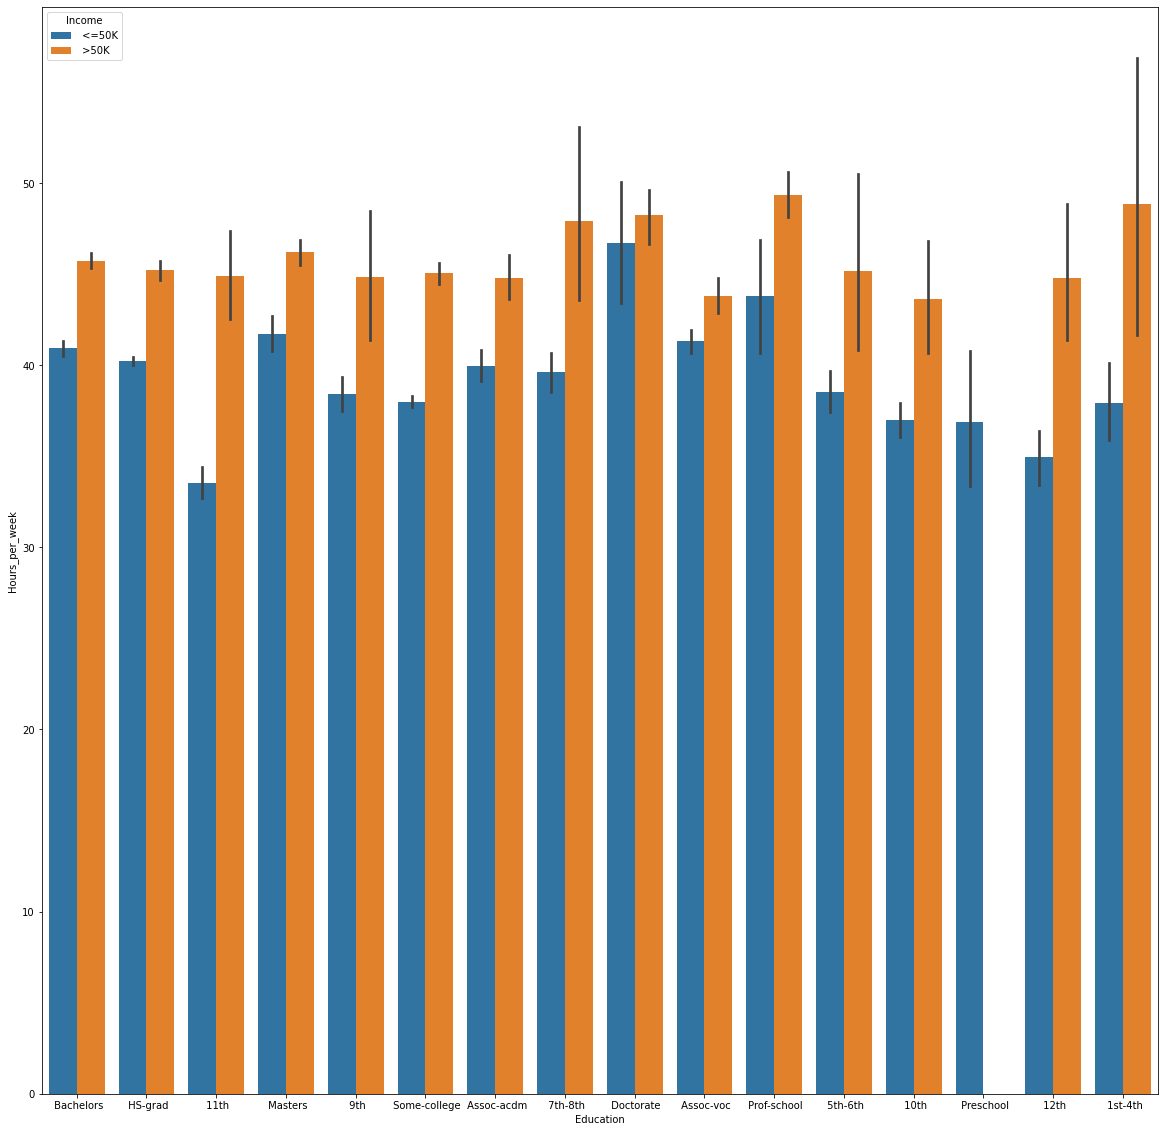

In [346]:
plt.figure(figsize=(20,20))
sns.barplot(x='Education',y='Hours_per_week',data=ci,hue='Income')

The above is a bar graph realting Education, Hours_per_week and Income.

In [347]:
ler = LabelEncoder() # label encoder 
ci['Income']=ler.fit_transform(ci['Income']) 
ci['Sex']=ler.fit_transform(ci['Sex'])
ci['Workclass']=ler.fit_transform(ci['Workclass'])
ci['Education']=ler.fit_transform(ci['Education']) 
ci['Marital_status']=ler.fit_transform(ci['Marital_status'])
ci['Occupation']=ler.fit_transform(ci['Occupation'])
ci['Relationship']=ler.fit_transform(ci['Relationship']) 
ci['Race']=ler.fit_transform(ci['Race'])
ci['Native_country']=ler.fit_transform(ci['Native_country'])

Converting the categorical values to binary values.

In [348]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


Displays the top 5 data in the dataframe.

In [349]:
X = ci.drop(['Income'],axis=1)
y = ci['Income']

Splitting the dataset and train it.

In [350]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=11)

In [351]:
lor = LogisticRegression() #Logistic Regression
knn = KNeighborsClassifier() #KNearest Neibour 
dtc = DecisionTreeClassifier() # Deciesion Tree
rfc = RandomForestClassifier() # Random Forest
abc = AdaBoostClassifier()    # Adaboost Classifier 
svm = SVC()              # Support vector classifier        
gbc = GradientBoostingClassifier() #Gradient Boosting Classifier 
xgbc = XGBClassifier()  #Xtrim Gredient Boosting Classifier 
print("Model Creation is done!!!")

Model Creation is done!!!


In [352]:
X_train.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

In [353]:
lor.fit(X_train, y_train)
knn.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)
abc.fit(X_train,y_train)
svm.fit(X_train,y_train)
gbc.fit(X_train,y_train)
xgbc.fit(X_train,y_train)
print("Model training is done!!!")

Model training is done!!!


In [354]:
print("Logistic Regression score",lor.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("Decision Tree Classification score",dtc.score(X_train,y_train))
print("Random Forest classification score",rfc.score(X_train,y_train))
print("AdaBoost classification score",abc.score(X_train,y_train))
print("Support Vector Machine classification score",svm.score(X_train,y_train))
print("Gradient Boost classification score",gbc.score(X_train,y_train))
print("XGBoost classification score",xgbc.score(X_train,y_train))

Logistic Regression score 0.7851458885941645
knn classification score 0.8292440318302388
Decision Tree Classification score 1.0
Random Forest classification score 1.0
AdaBoost classification score 0.860695339143615
Support Vector Machine classification score 0.7859984842743464
Gradient Boost classification score 0.867752936718454
XGBoost classification score 0.9106669192876089


In [355]:
lor_ypred = lor.predict(X_test)
knn_ypred = knn.predict(X_test)
dtc_ypred = dtc.predict(X_test)
rfc_ypred = rfc.predict(X_test)
abc_ypred = abc.predict(X_test)
svm_ypred = svm.predict(X_test)
gbc_ypred = gbc.predict(X_test)
xgbc_ypred = xgbc.predict(X_test)

In [356]:
lor_conf = confusion_matrix(y_test,lor_ypred)
print("confusion matrix for Logistic Regression model",'\n',lor_conf)

confusion matrix for Logistic Regression model 
 [[6511  309]
 [1640  589]]


In [357]:
knn_conf = confusion_matrix(y_test,knn_ypred)
print("confusion matrix for knn_model",'\n',knn_conf)

confusion matrix for knn_model 
 [[6227  593]
 [1550  679]]


In [358]:
dtc_conf = confusion_matrix(y_test,dtc_ypred)
print("confusion matrix for dtc_model",'\n',dtc_conf)

confusion matrix for dtc_model 
 [[5880  940]
 [ 852 1377]]


In [359]:
rfc_conf = confusion_matrix(y_test,rfc_ypred)
print("confusion matrix for rfc_model",'\n',rfc_conf)

confusion matrix for rfc_model 
 [[6298  522]
 [ 822 1407]]


In [360]:
abc_conf = confusion_matrix(y_test,abc_ypred)
print("confusion matrix for abc_model",'\n',abc_conf)

confusion matrix for abc_model 
 [[6370  450]
 [ 897 1332]]


In [361]:
svm_conf = confusion_matrix(y_test,svm_ypred)
print("confusion matrix for svm_model",'\n',svm_conf)

confusion matrix for svm_model 
 [[6818    2]
 [1911  318]]


In [362]:
gbc_conf = confusion_matrix(y_test,gbc_ypred)
print("confusion matrix for gdboost_model",'\n',gbc_conf)

confusion matrix for gdboost_model 
 [[6419  401]
 [ 893 1336]]


In [363]:
xgbc_conf = confusion_matrix(y_test,xgbc_ypred)
print("confusion matrix for xgboost_model",'\n',xgbc_conf)

confusion matrix for xgboost_model 
 [[6318  502]
 [ 731 1498]]


In [364]:
lor_report = classification_report(y_test,lor_ypred)
print(" lor classification_report" ,'\n',lor_report)

knn_report = classification_report(y_test,knn_ypred)
print(" knn classification_report" ,'\n',knn_report)

dtc_report = classification_report(y_test,dtc_ypred)
print(" dt classification_report" ,'\n',dtc_report)


rfc_report = classification_report(y_test,rfc_ypred)
print(" rfc classification_report" ,'\n',rfc_report)


abc_report = classification_report(y_test,abc_ypred)
print(" adb classification_report" ,'\n',abc_report)


svm_report = classification_report(y_test,svm_ypred)
print(" svm classification_report" ,'\n',svm_report)


gbc_report = classification_report(y_test,gbc_ypred)
print(" gdboost classification_report" ,'\n',gbc_report)


xgbc_report = classification_report(y_test,xgbc_ypred)
print(" xgboost classification_report" ,'\n',xgbc_report)

 lor classification_report 
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      6820
           1       0.66      0.26      0.38      2229

    accuracy                           0.78      9049
   macro avg       0.73      0.61      0.62      9049
weighted avg       0.76      0.78      0.75      9049

 knn classification_report 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      6820
           1       0.53      0.30      0.39      2229

    accuracy                           0.76      9049
   macro avg       0.67      0.61      0.62      9049
weighted avg       0.73      0.76      0.74      9049

 dt classification_report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      6820
           1       0.59      0.62      0.61      2229

    accuracy                           0.80      9049
   macro avg       0.73      0.74      0.7